# JOBarcelona 23 | Data Science

# Introducción

Somos un banco que dispone de una base de datos con una gran cantidad de información sobre nuestros clientes. Nuestro objetivo es ayudar a los analistas a **predecir la tasa de abandono** de estos clientes para así poder reducirla. La base de datos incluye información demográfica como la edad, el sexo, el estado civil y la categoría de ingresos. También contiene información sobre el tipo de tarjeta, el número de meses en cartera y los periodos inactivos. Además, dispone de datos clave sobre el comportamiento de gasto de los clientes que se acercan a su decisión de cancelación. Entre esta última información hay el saldo total renovable, el límite de crédito, la tasa media de apertura a la compra y métricas analizables como el importe total del cambio del cuarto trimestre al primero o el índice medio de utilización.

Frente a este conjunto de datos podemos capturar información actualizada que puede determinar la estabilidad de la cuenta a largo plazo o su salida inminente.

## Variables

- `CLIENTNUM`: Id de cada cliente. *Int*
- `Attrition_Flag`: Indicador de si el cliente ha abandonado el banco o se queda *Bool* ( `0` abandonado `1` no) -> **TARGET**
- `Customer_Age`: Edad del cliente. *Int*
- `Gender`: Sexo del cliente. *Str*
- `Dependent_count`: Número de personas a cargo que tiene el cliente. *Int*
- `Education_Level`: Nivel educativo del cliente. *Str*
- `Marital_Status`: Estado civil del cliente. *Str*
- `Income_Category`: Ingresos del cliente. *Str*
- `Card_Category`: Tipo de tarjeta del cliente. *Str*
- `Months_on_book`: El tiempo que el cliente ha estado en los libros. *Int*
- `Total_Relationship_Count`: Número total de relaciones que tiene el cliente con el proveedor de la tarjeta de crédito. *Int*
- `Months_Inactive_12_mon`: Número de meses que el cliente ha estado inactivo en los últimos doce meses. *Int*
- `Contacts_Count_12_mon`: Número de contactos que ha tenido el cliente en los últimos doce meses. *Int*
- `Credit_Limit`: Límite de crédito del cliente. *Int*
- `Total_Revolving_Bal`: Saldo renovable total del cliente. *Int*
- `Avg_Open_To_Buy`: Ratio medio de apertura a la compra del cliente. *Int*
- `Total_Amt_Chng_Q4_Q1`: Importe total cambiado del trimestre 4 al trimestre 1. *Int*
- `Total_Trans_Amt`: Importe total de la transacción. *Int*
- `Total_Trans_Ct`: Recuento total de transacciones. *Int*
- `Total_Ct_Chng_Q4_Q1`: Recuento total cambiado del trimestre 4 al trimestre 1. *Int*
- `Avg_Utilization_Ratio`: Ratio de utilización medio del cliente. *Int*
- `Months_Inactive_12_mon`: Número de meses que el cliente ha estado inactivo en los últimos doce meses. *Int*
- `Contacts_Count_12_mon`: Número de contactos que ha tenido el cliente en los últimos doce meses. *Int*
- `Credit_Limit`: Límite de crédito del cliente. *Int*
- `Total_Revolving_Bal`: Saldo rotativo total del cliente. *Int*
- `Avg_Open_To_Buy`: Ratio medio de apertura a compra del cliente. *Int*
- `Total_Amt_Chng_Q4_Q1`: Importe total cambiado del trimestre 4 al trimestre 1. (Integer)
- `Total_Trans_Amt`: Importe total de la transacción. *Int*
- `Total_Trans_Ct`: Recuento total de transacciones. *Int*
- `Total_Ct_Chng_Q4_Q1`: Recuento total cambiado del trimestre 4 al trimestre 1. *Int*
- `Avg_Utilization_Ratio`: Ratio de utilización medio del cliente. *Int*


## Objetivo
Crea un modelo predictivo de clasificación para poder clasificar los datos del archivo de testing. Primero entrena tu modelo con el conjunto de datos de training y una vez que tengas el modelo que maximice la puntuación f1 (macro.) utiliza los datos de testing como entrada para tu modelo.


# Importación de los datos

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd

sns.set_style('darkgrid')

In [2]:
''' lectura de los datos '''
train = pd.read_csv('./Data/train.csv', index_col=[0])
test = pd.read_csv('./Data/test.csv', index_col=[0])

In [3]:
train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [4]:
test.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
test_idx,,,,,,,,,,,,,,,,,,,,
0,719455083,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


In [5]:
''' proporción de la target '''
train.Attrition_Flag.value_counts() # DESbalanceada

1    6801
0    1300
Name: Attrition_Flag, dtype: int64

Primer problema con el que nos encontramos, gran desproporción de la variable objetivo, tendremos que recurrir a técnicas de sampleo si queremos que el modelo ajuste bien para datos de tipo `1`.

In [6]:
''' dtype de las variables '''
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8101 non-null   int64  
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Open

# Análisis de datos

In [7]:
''' shape de los sets de datos'''
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (8101, 21)
test shape: (2026, 20)


In [8]:
''' valores missing train '''
pd.DataFrame([train.isna().sum(),train.isna().sum()*100/train.shape[0]],index = ['conteo missing train','% missings train']).T

,conteo missing train,% missings train
CLIENTNUM,0.0,0.0
Customer_Age,0.0,0.0
Gender,0.0,0.0
Dependent_count,0.0,0.0
Education_Level,0.0,0.0
Marital_Status,0.0,0.0
Income_Category,0.0,0.0
Card_Category,0.0,0.0
Months_on_book,0.0,0.0
Total_Relationship_Count,0.0,0.0


In [9]:
''' valores missing test '''
pd.DataFrame([test.isna().sum(), test.isna().sum() * 100 / test.shape[0]], index=['conteo missing', '% missings']).T

,conteo missing,% missings
CLIENTNUM,0.0,0.0
Customer_Age,0.0,0.0
Gender,0.0,0.0
Dependent_count,0.0,0.0
Education_Level,0.0,0.0
Marital_Status,0.0,0.0
Income_Category,0.0,0.0
Card_Category,0.0,0.0
Months_on_book,0.0,0.0
Total_Relationship_Count,0.0,0.0


In [10]:
''' localización de duplicados'''
print(f'valores duplicados en train: {train.duplicated().sum()}')
print(f'valores duplicados en test: {test.duplicated().sum()}')

valores duplicados en train: 0
valores duplicados en test: 0


In [12]:
''' descriptivos numéricas'''
round(train.describe(), 2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,8.101000e+03,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00
mean,7.391329e+08,46.31,2.33,35.92,3.81,2.35,2.45,8636.55,1160.38,7476.17,0.76,4402.99,64.91,0.71,0.27,0.84
std,3.691912e+07,8.02,1.29,8.02,1.55,1.01,1.10,9086.42,815.50,9080.28,0.22,3401.71,23.56,0.24,0.27,0.37
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00
25%,7.130534e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,326.00,1341.00,0.63,2160.00,45.00,0.58,0.02,1.00
50%,7.178860e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1273.00,3495.00,0.74,3897.00,67.00,0.70,0.17,1.00
75%,7.728464e+08,52.00,3.00,40.00,5.00,3.00,3.00,11128.00,1782.00,9942.00,0.86,4739.00,81.00,0.82,0.50,1.00
max,8.283431e+08,70.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,2.68,18484.00,139.00,3.71,1.00,1.00


In [13]:
''' descriptivos categóricas'''
train.describe(include='O')

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,8101,8101,8101,8101,8101
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,4279,2528,3767,2812,7557


Observamos como los datos están perfectamente tratados, sin variables *missing* ni categorías o datos extraños. Por tanto, tan sólo queda ver la distribución y analizar posibles cambios en las variables

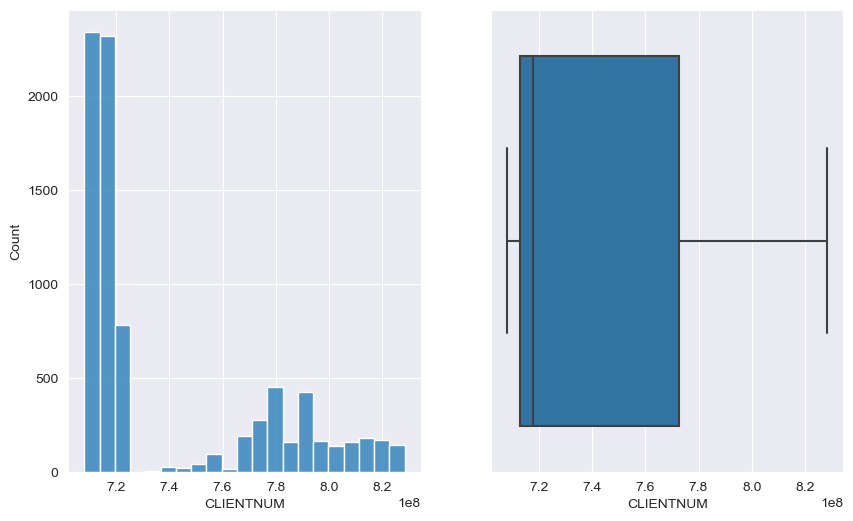

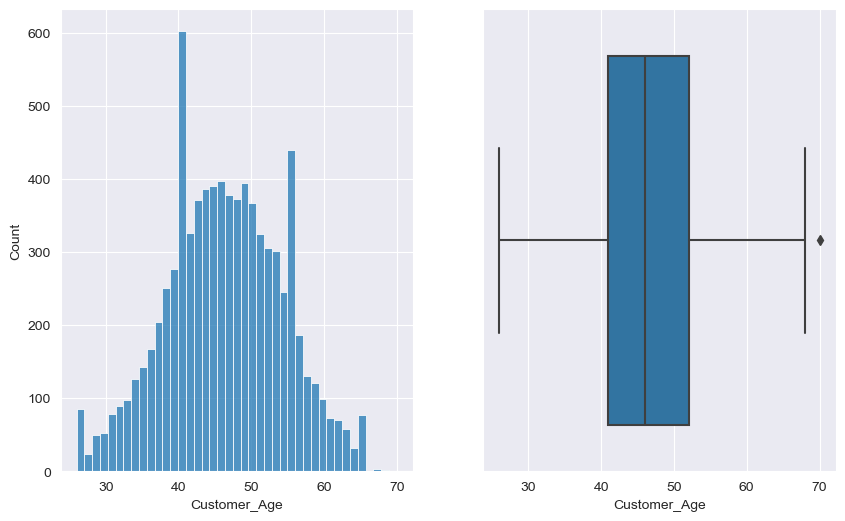

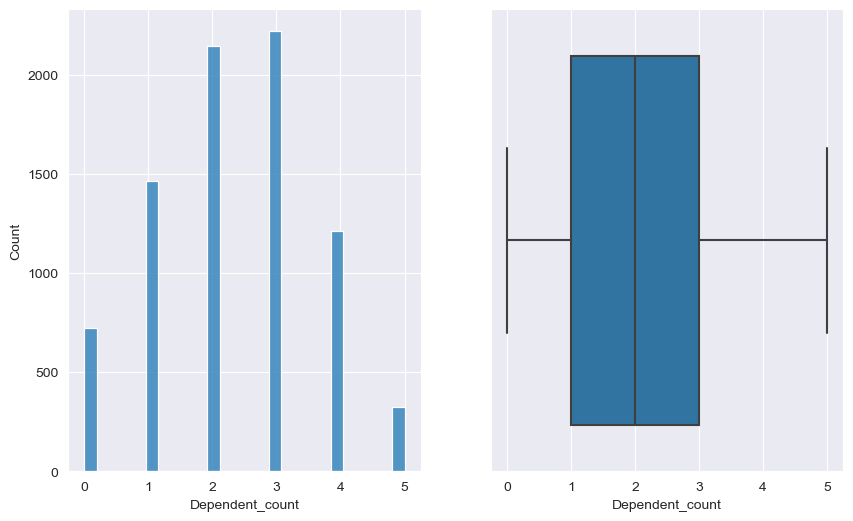

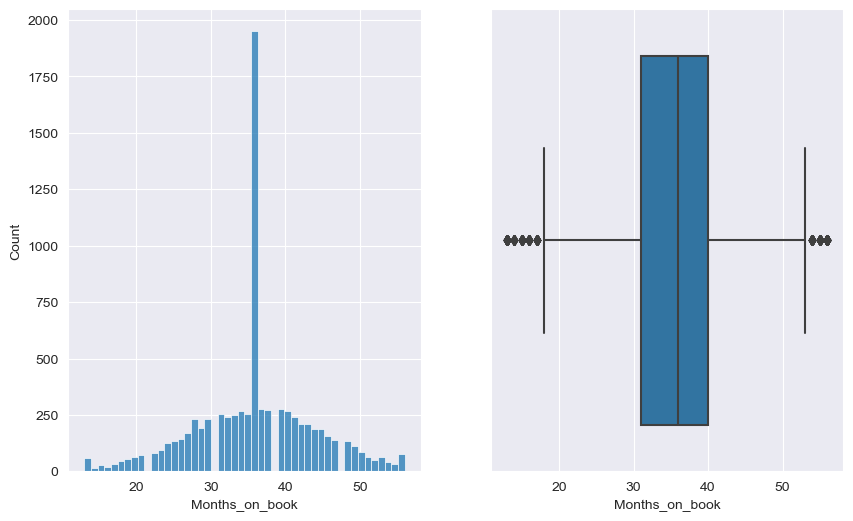

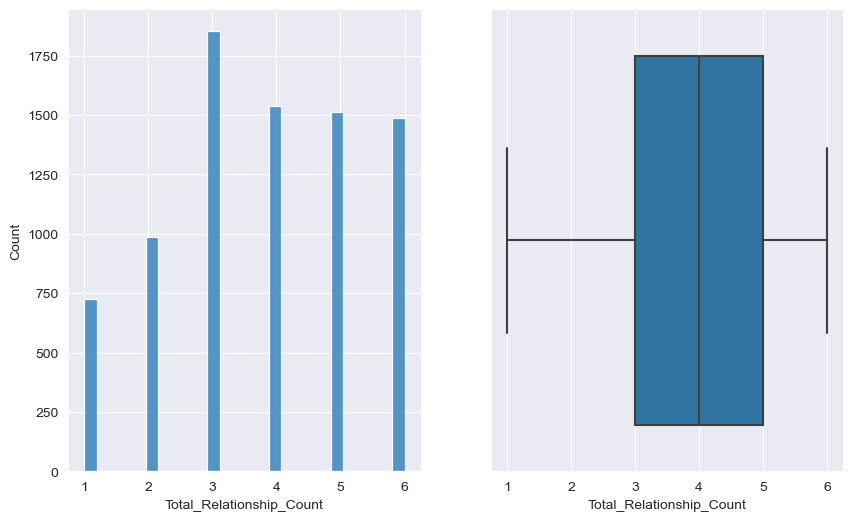

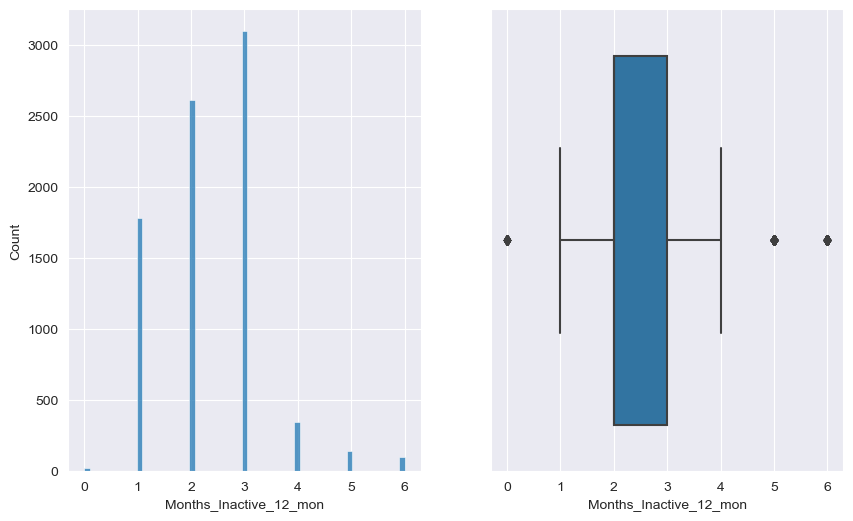

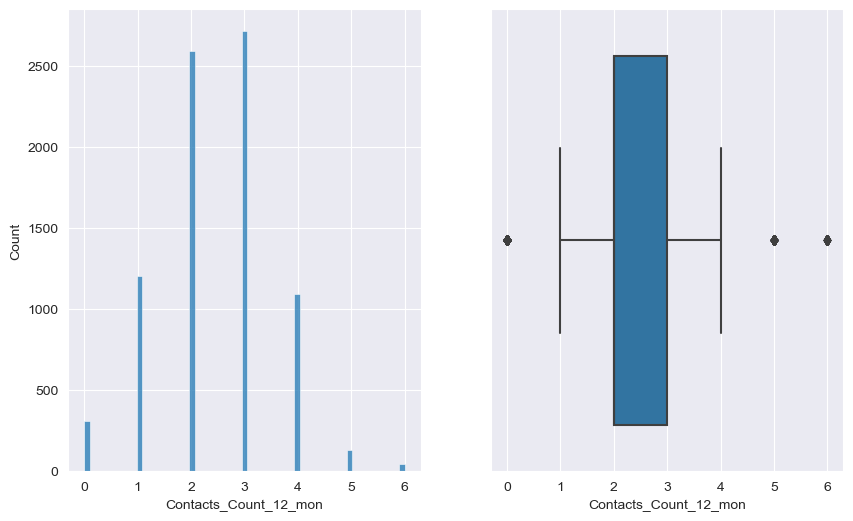

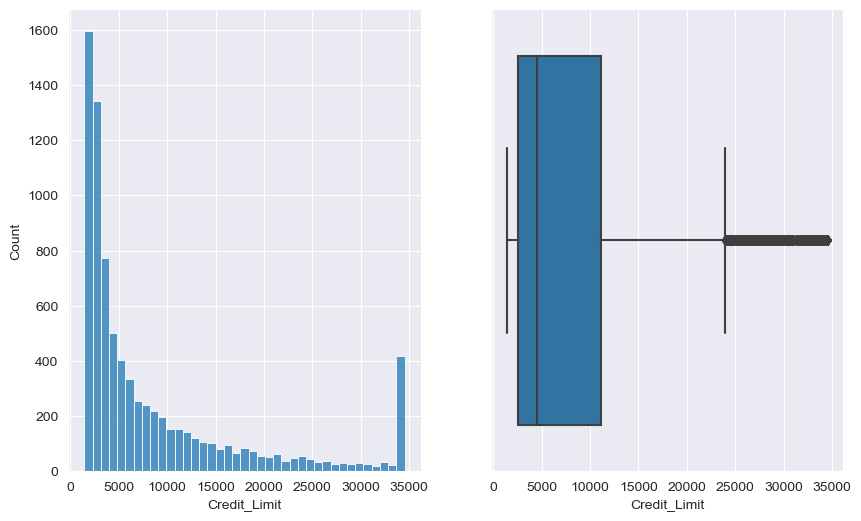

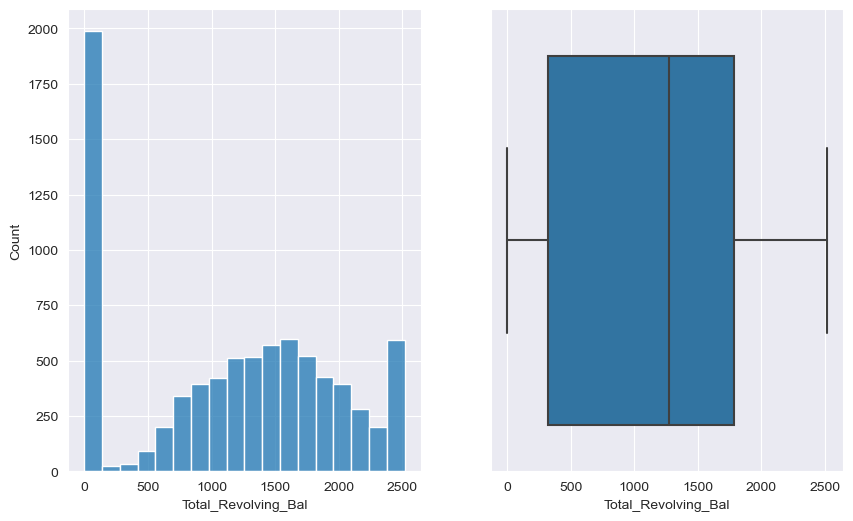

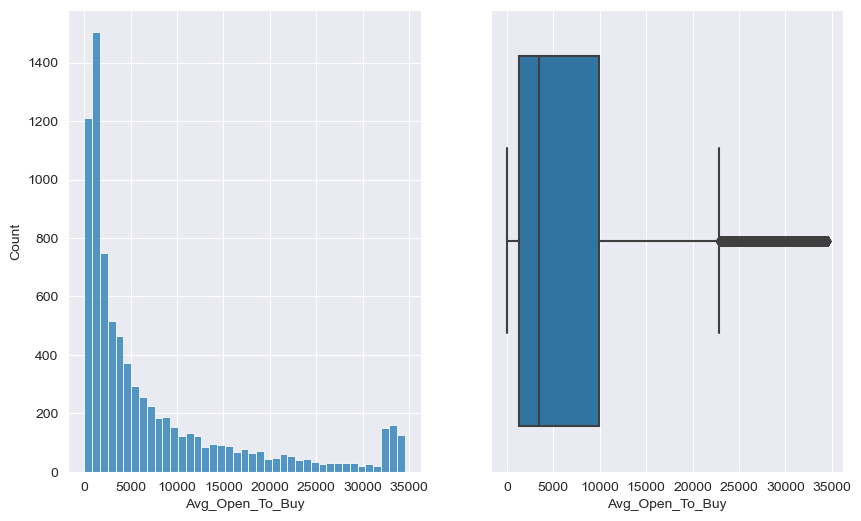

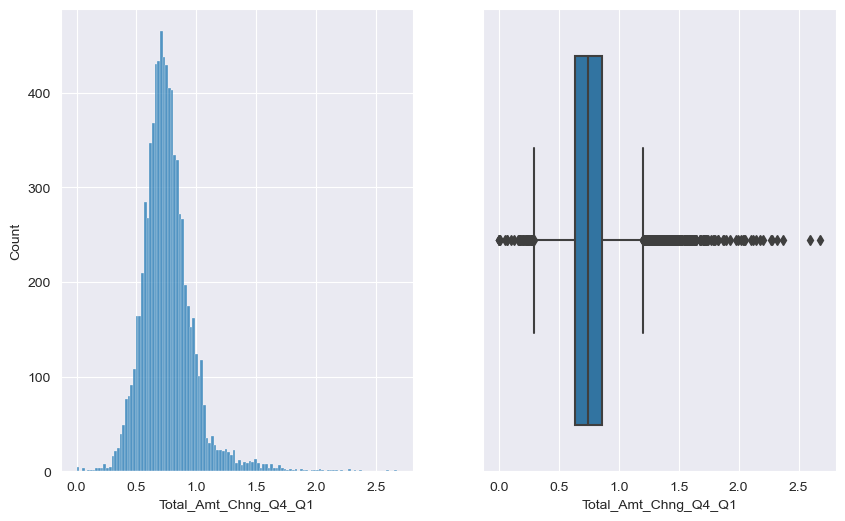

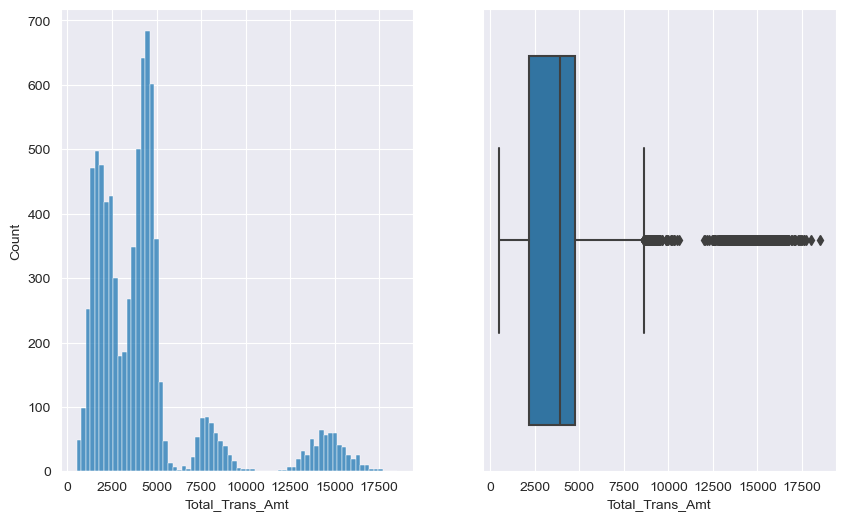

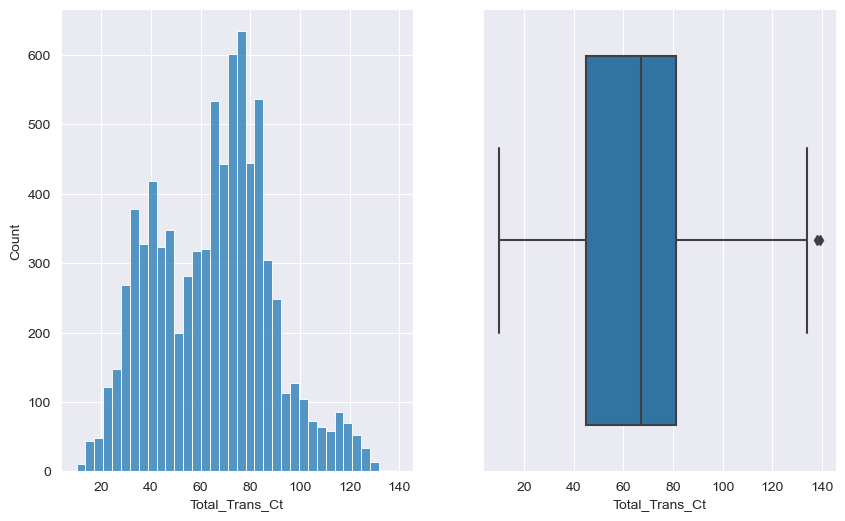

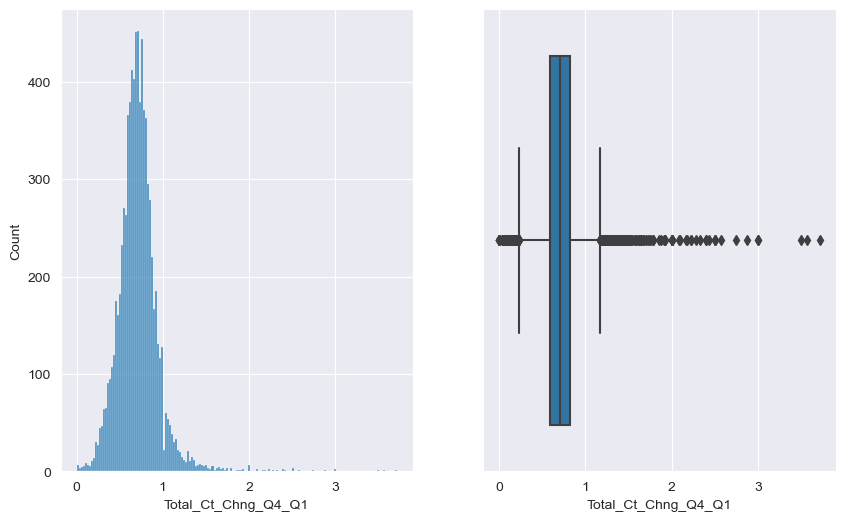

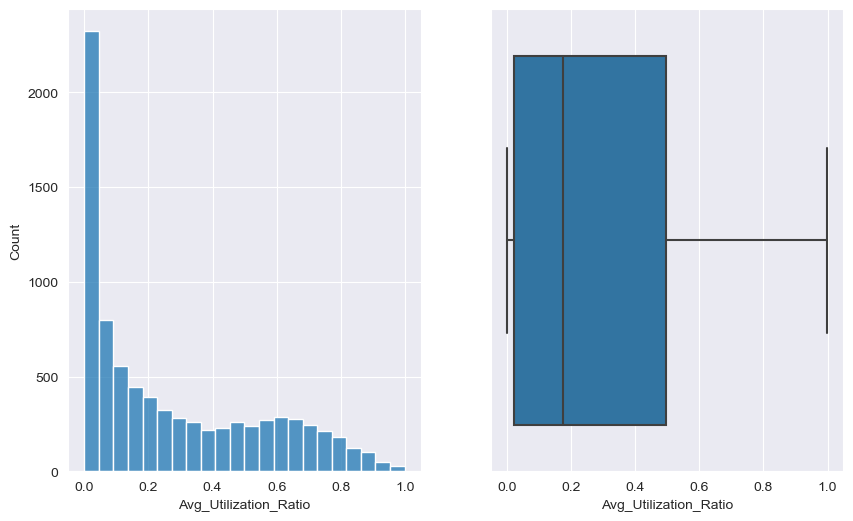

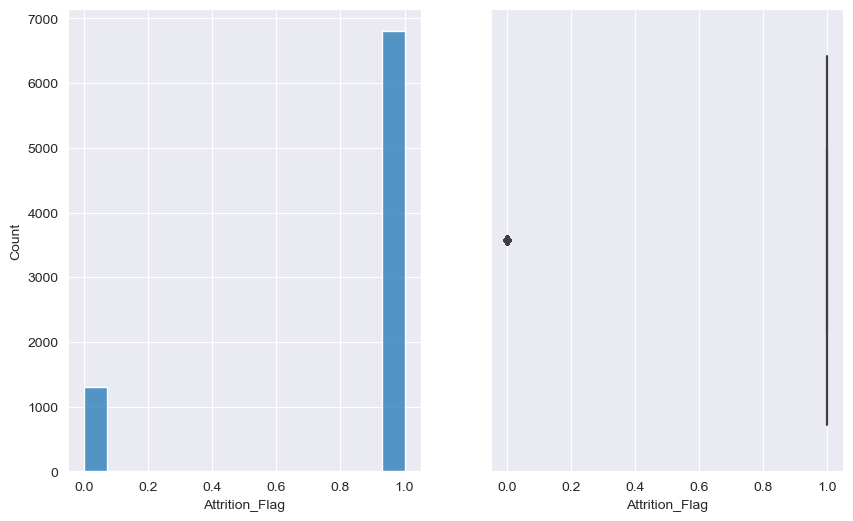

In [32]:
''' distribución gráfica de las variables categóricas'''

numerical_cols = [cname for cname in train.columns if train[cname].dtype != "object"]
for c in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.subplot(1,2,1)
    sns.histplot(data=train, x=c)
    plt.subplot(1,2,2)
    sns.boxplot(data=train, x=c)
    plt.show()

Es posible que variables como `Avg_Utilziation_Ratio` se beneficien de una transformación de tipo logarítmica, para ajustar los datos a una distribución de tipo normal.

En general, haremos una transformación de tipo *yeo-jhonson* a los datos para buscar mejorar el rendimiento del modelo.

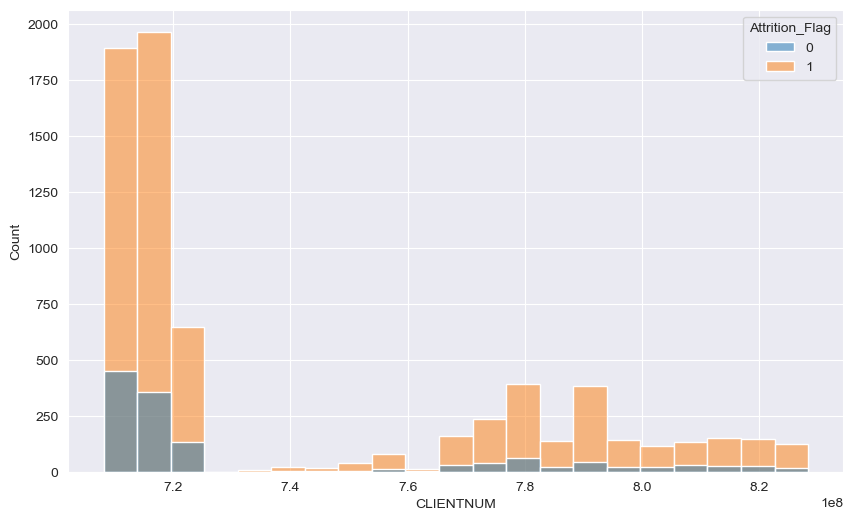

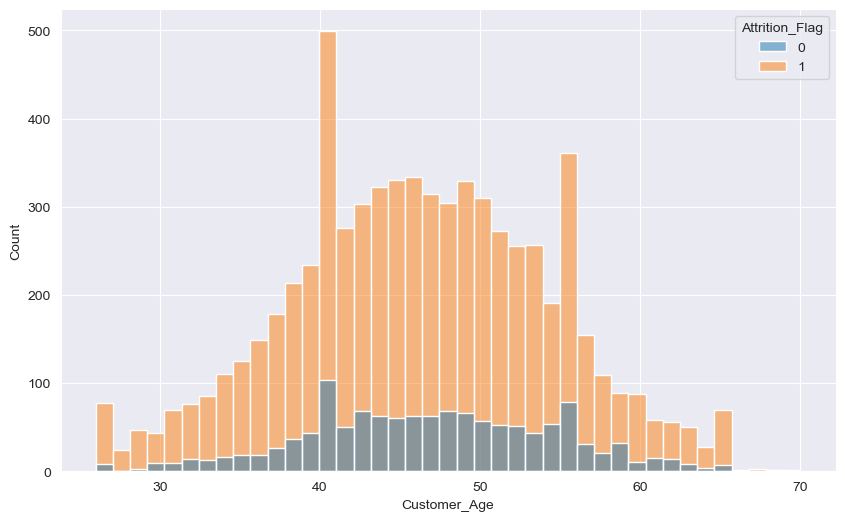

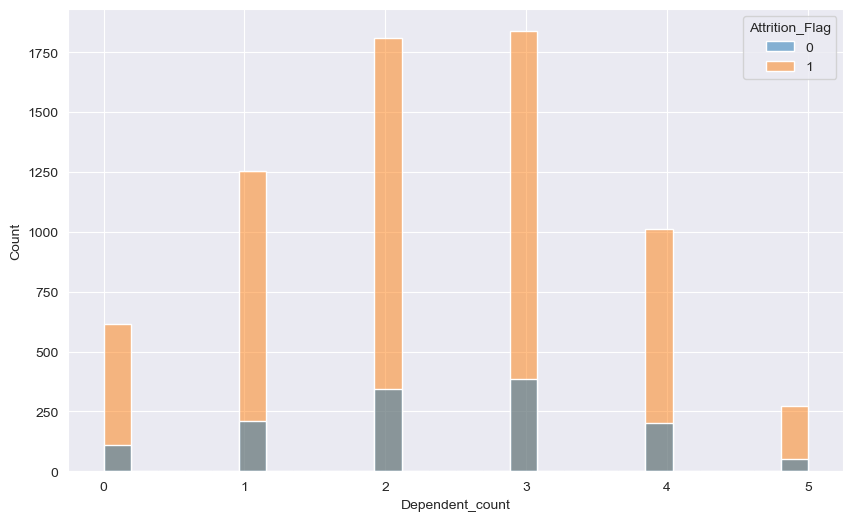

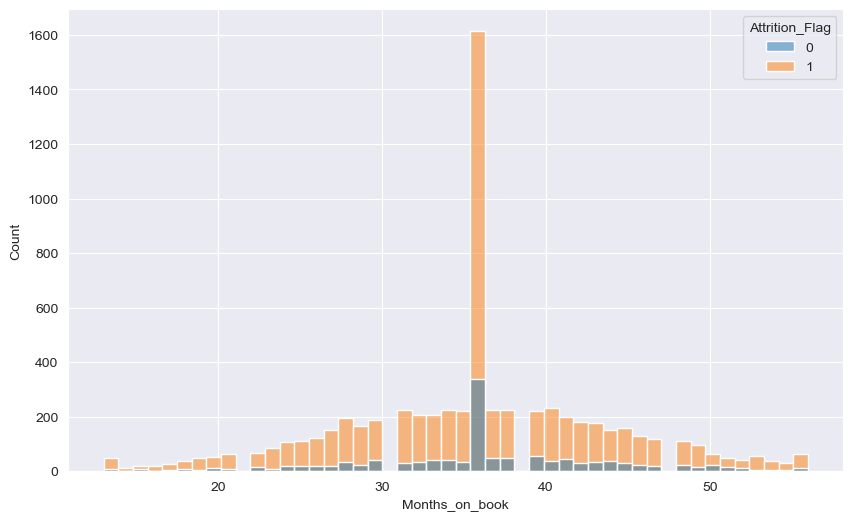

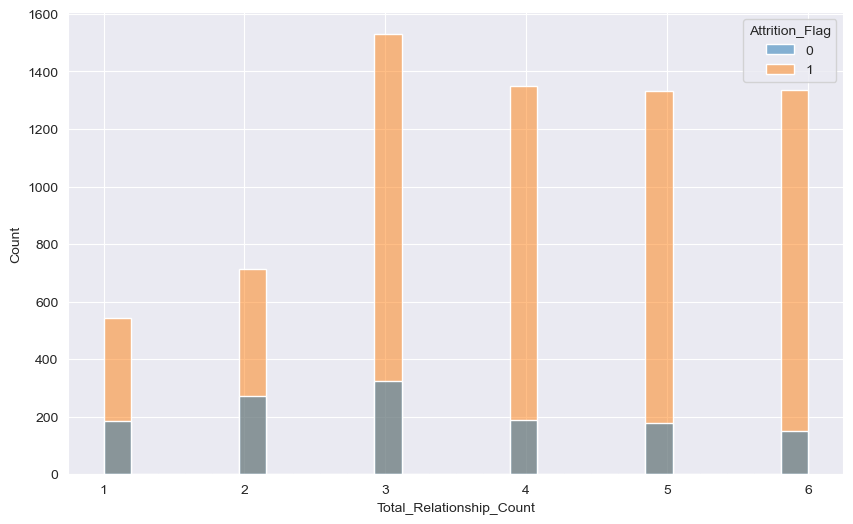

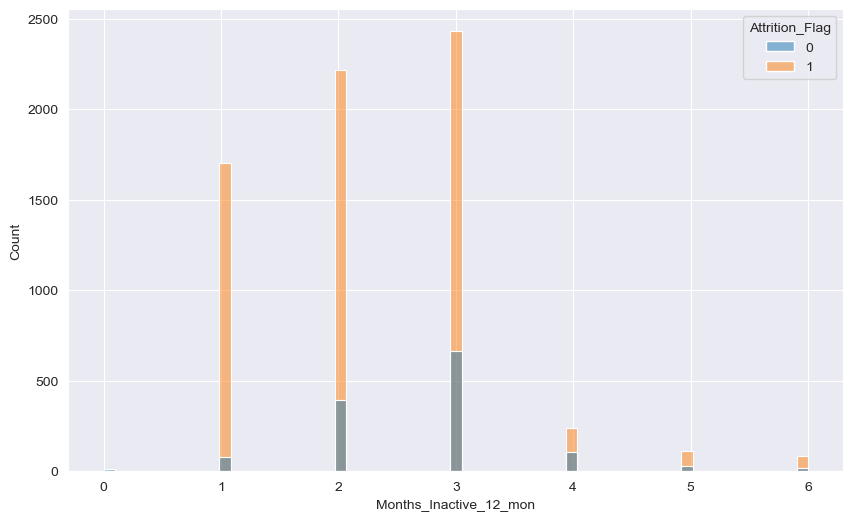

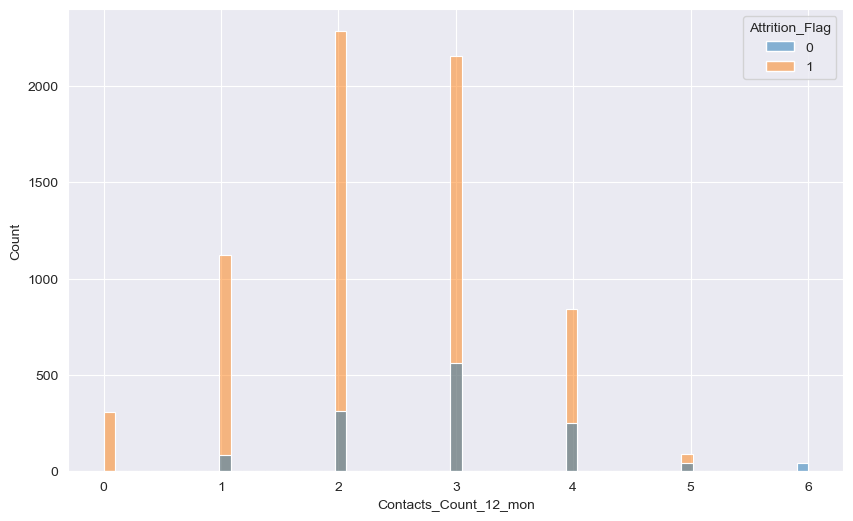

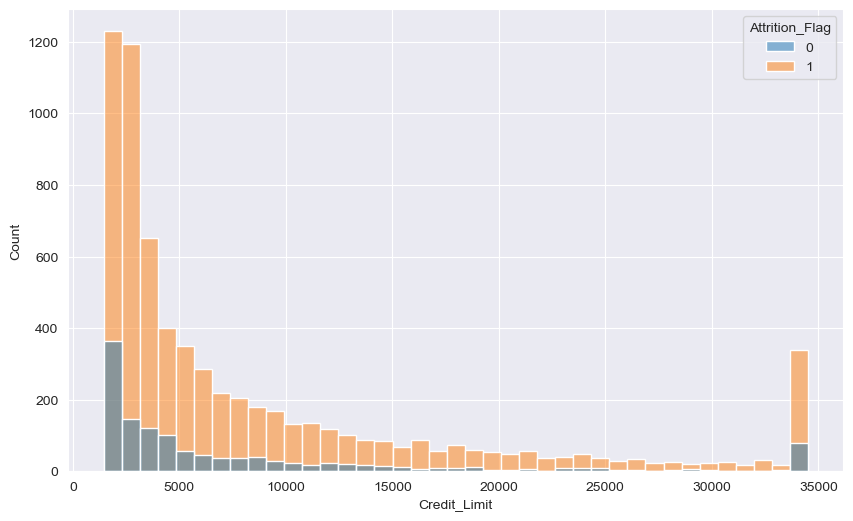

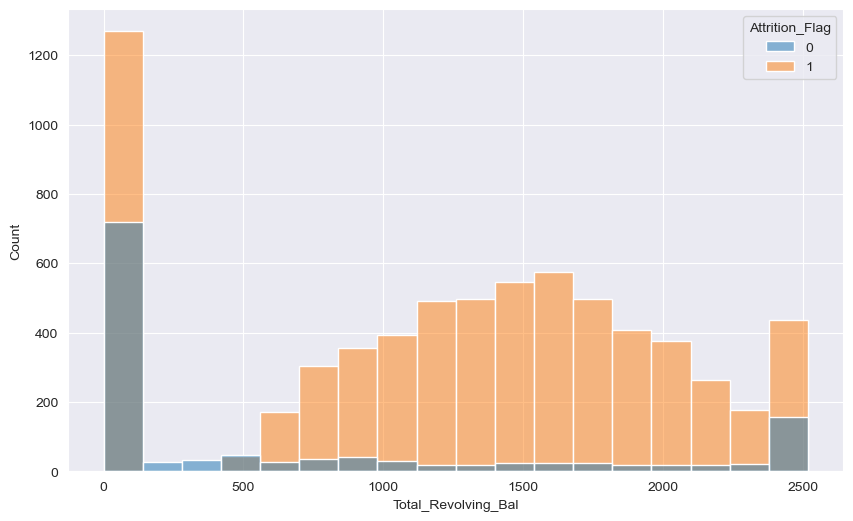

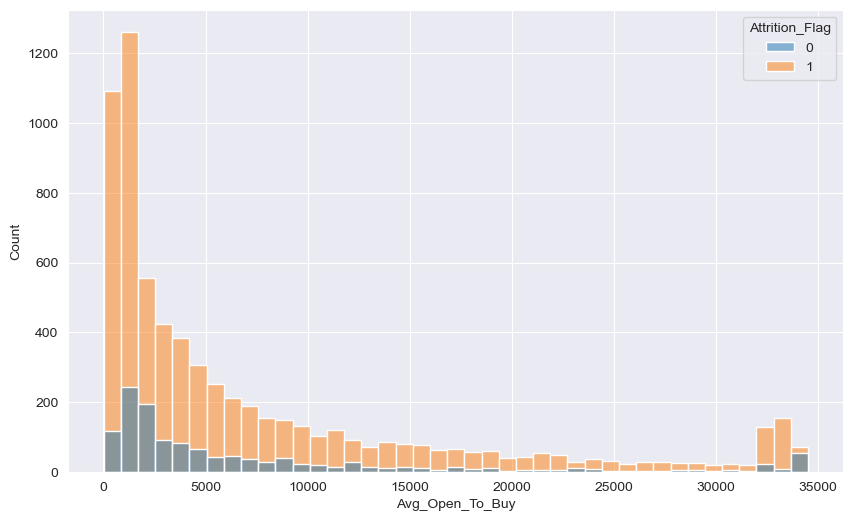

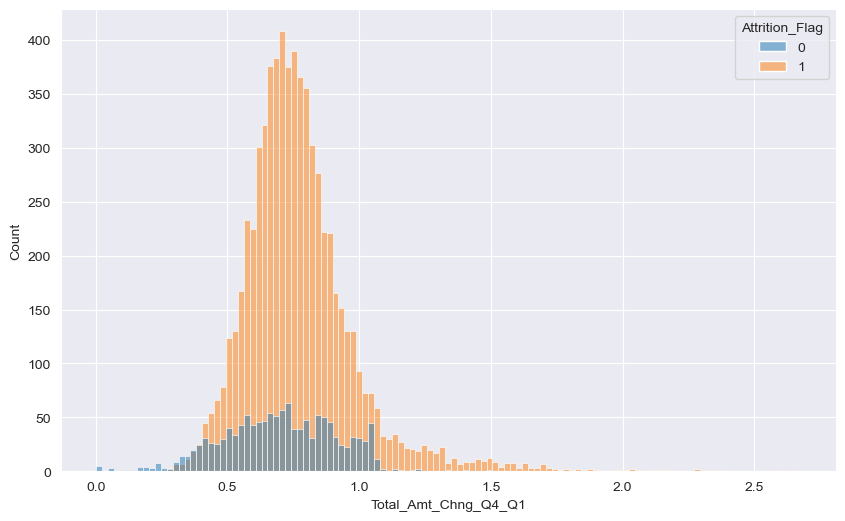

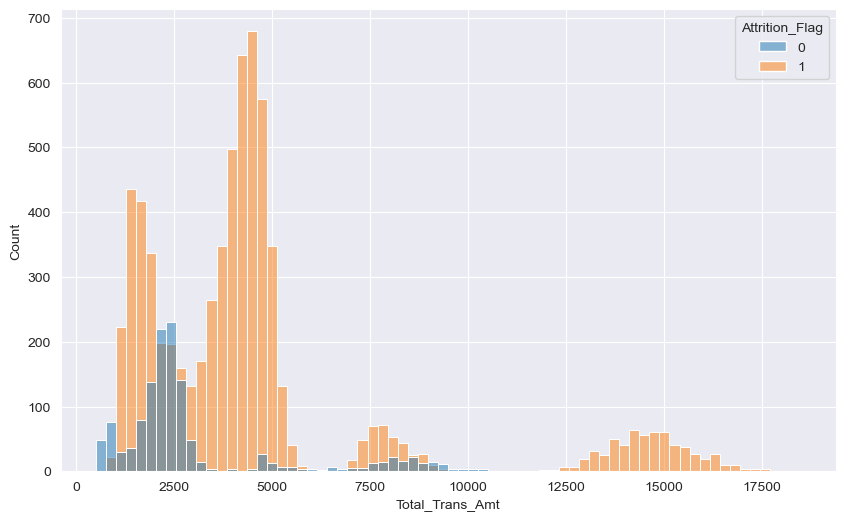

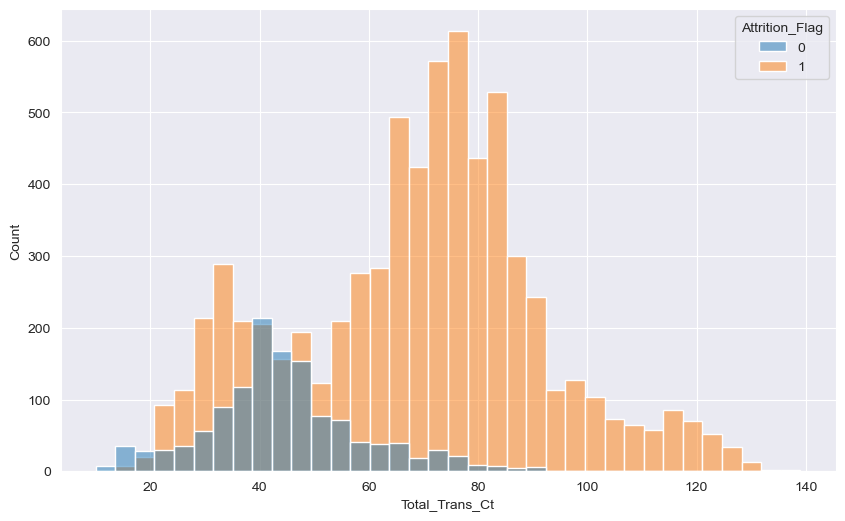

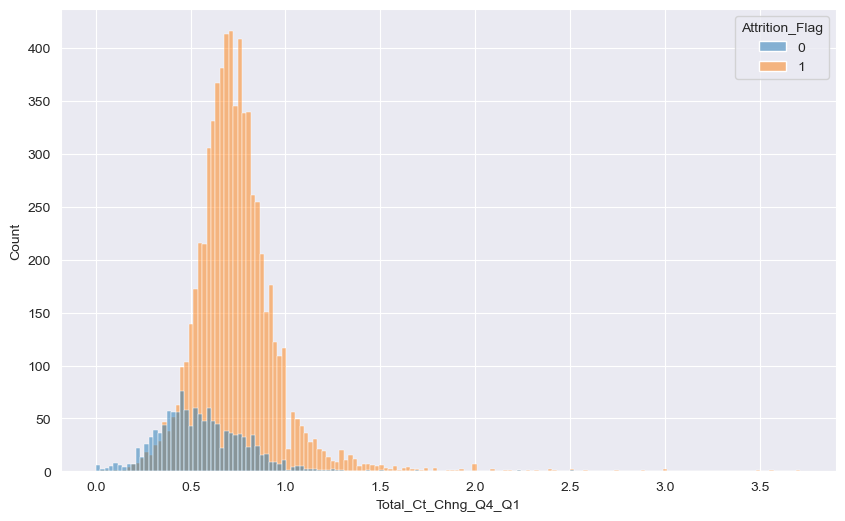

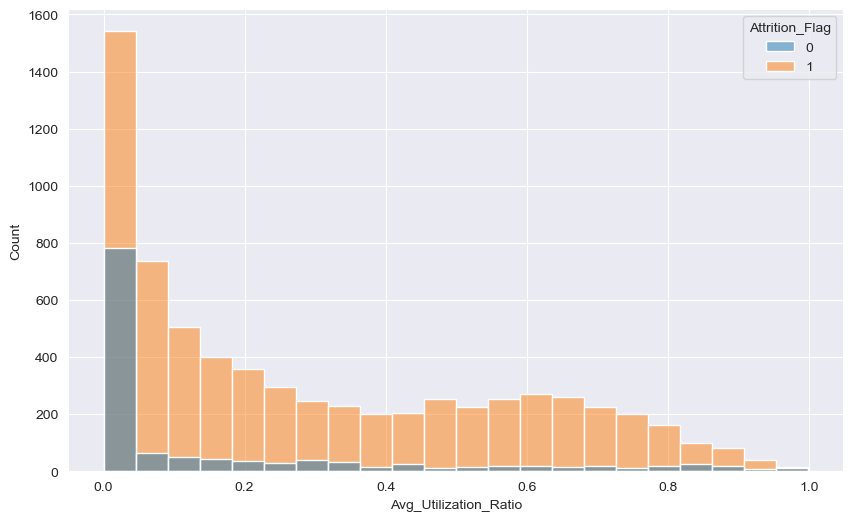

In [36]:
for c in numerical_cols:
    if c != 'Attrition_Flag':
        plt.figure(figsize=(10, 6))
        sns.histplot(data=train, x=c, hue='Attrition_Flag')
        plt.show()

A pesar del claro desbalance de los datos, podemos ver variables cuya distribución varía dependiendo del `Atrittion_Flag`. Por tanto, variables como `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` o `Total_Trans_Amt` tendrán gran importancia en nuestro modelo. Estas variables han sido transformadas (un conteo de las transacciones, el cambio de las mismas en un periodo de tiempo) precisamente buscando aportar la máxima información. El identificador de cliente, `CLIENT_NUM`, realmente no debería aportar información al modelo, por lo que debería eliminarse de este.

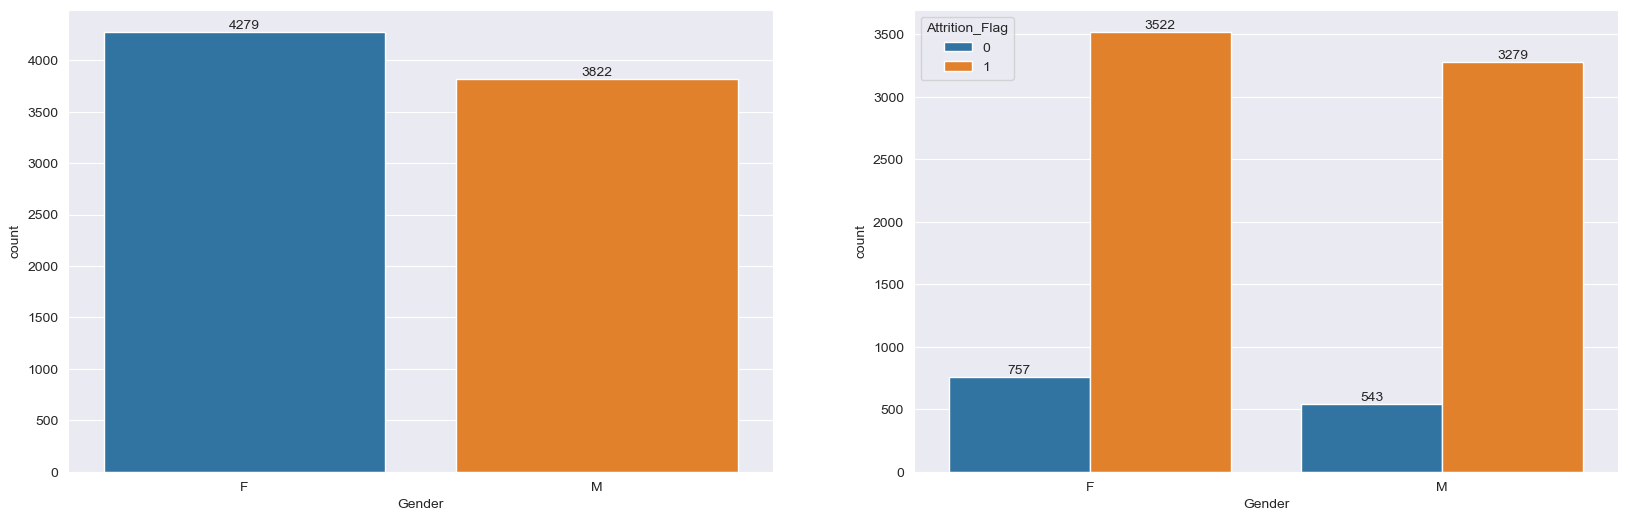

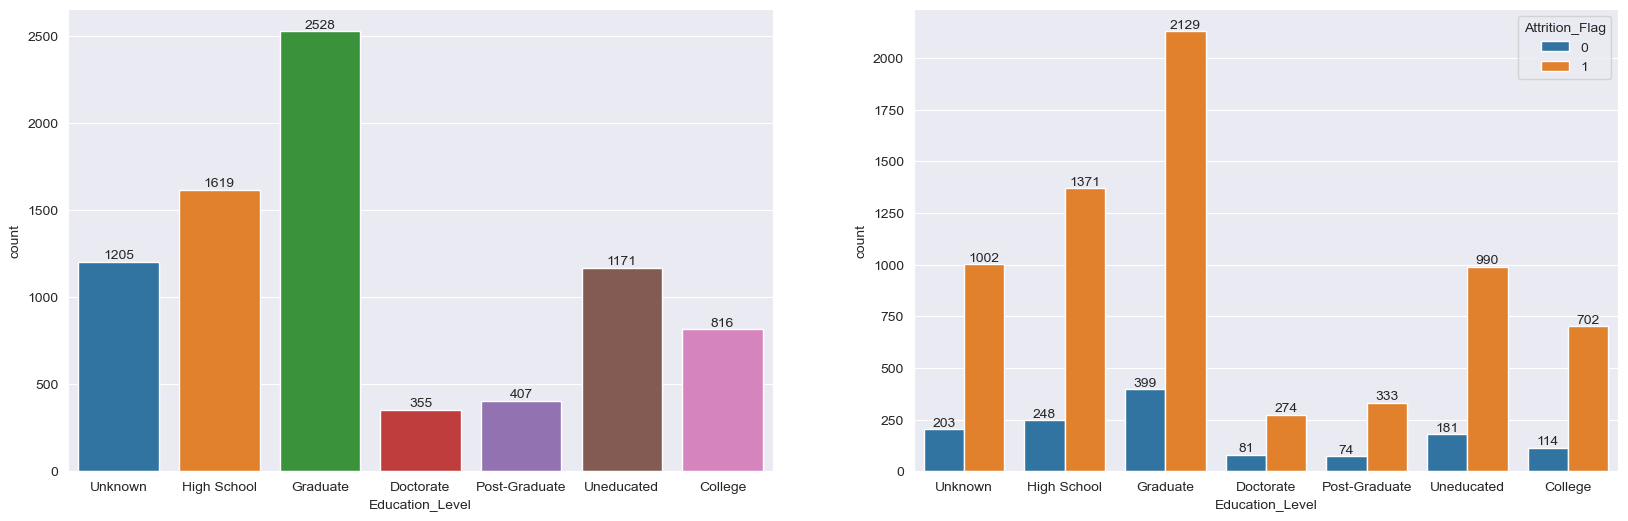

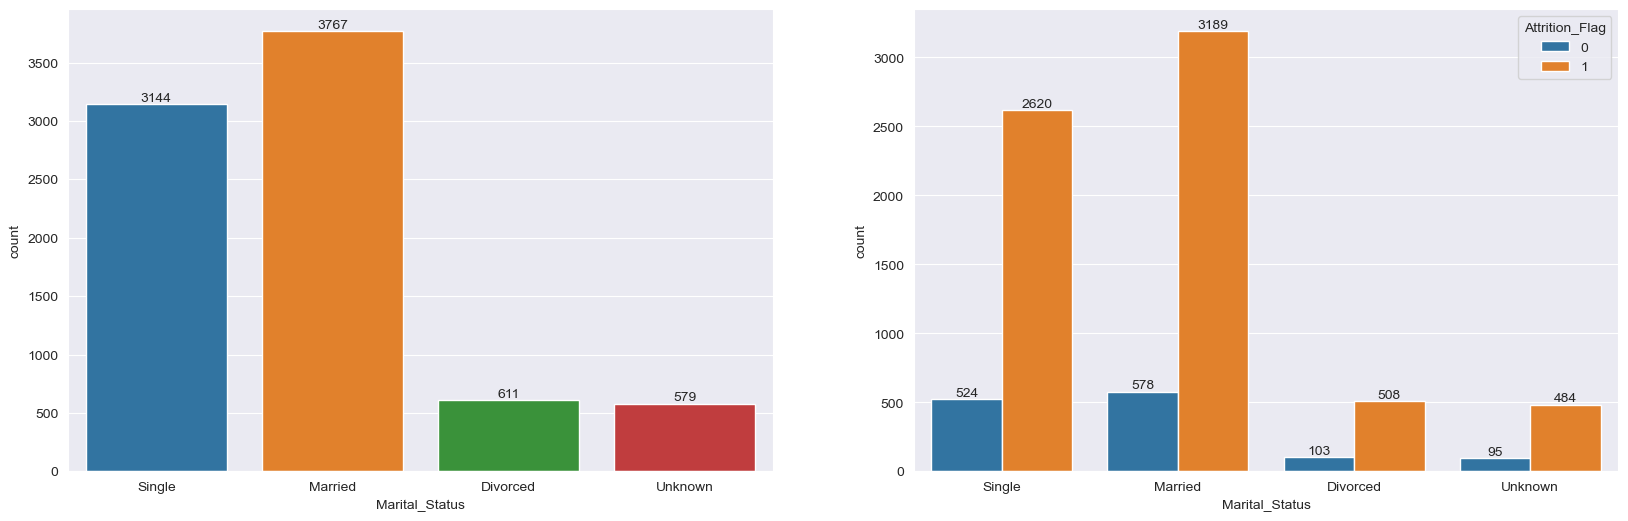

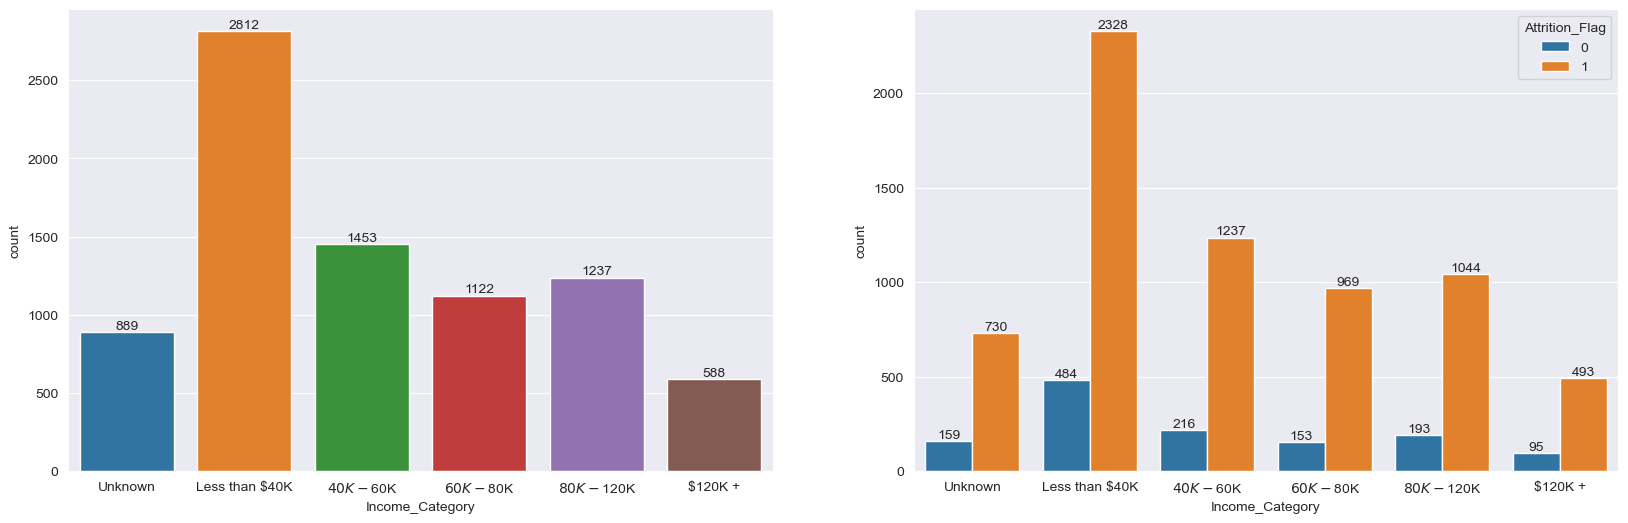

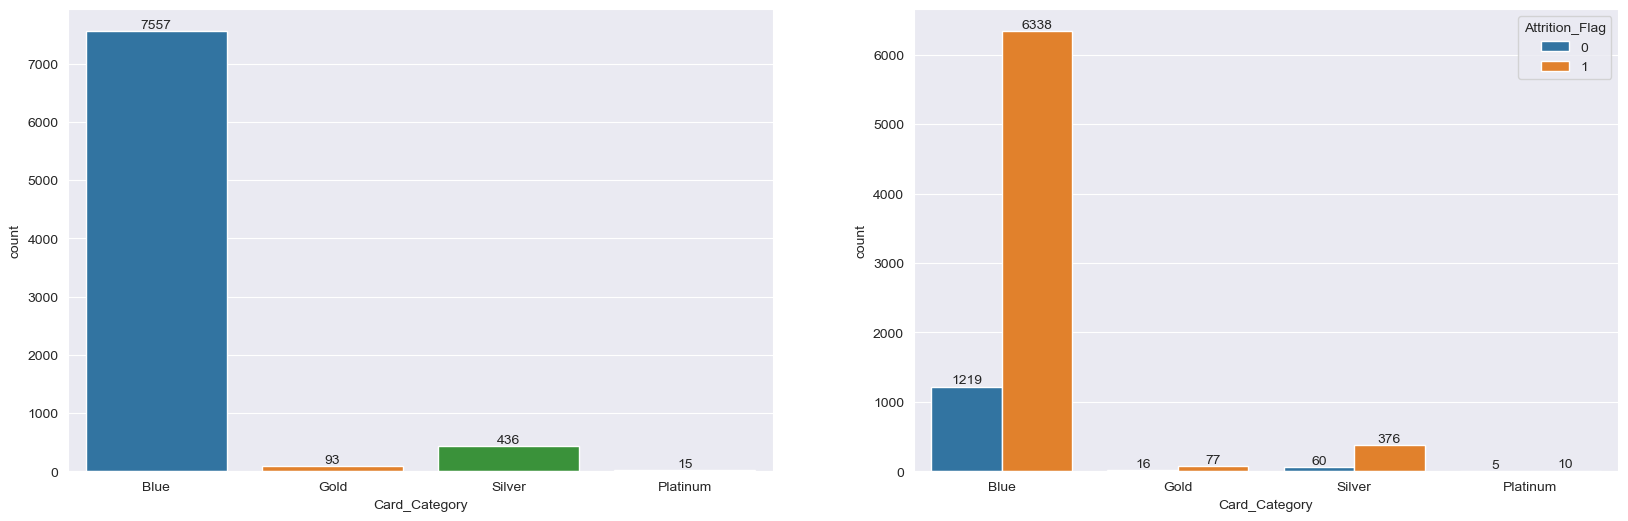

In [22]:
''' distribución gráfica de las variables categóricas'''

categorical_cols = [cname for cname in train.columns if train[cname].dtype == "object"]
for c in categorical_cols:
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    ax = sns.countplot(data=train, x=c)
    for container in ax.containers:
        ax.bar_label(container)
    plt.subplot(1,2,2)
    ax = sns.countplot(data=train, x=c, hue='Attrition_Flag' )
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

Podemos ver como la distribución de algunas variables está completamente desbalanceada. Por ejemplo, la variable `Card_Category` tiene 4 categorías, aunque, con respecto al valor `Blue` el resto son outliers. Es por esto por lo que convendría recategorizarla.

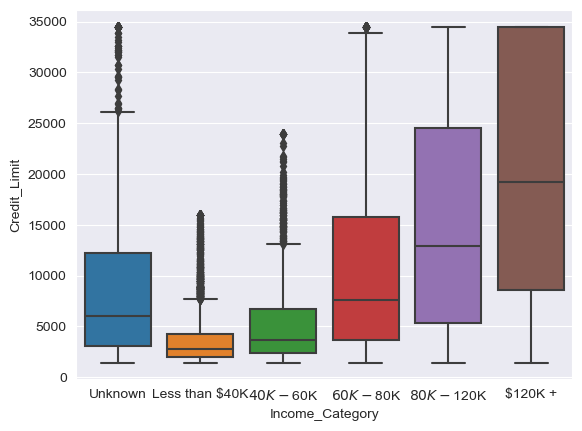

In [42]:
sns.boxplot(
    x="Income_Category", y="Credit_Limit", data=train
)
plt.show()

Vemos como a más ingresos mayor es el límite de crédito. Creamos una variable de interacción:

In [53]:
# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
inc = pd.get_dummies(train.Income_Category, prefix="IncCat")
# Multiply
inc = pd.DataFrame(inc.mul(train.Credit_Limit, axis=0))
inc

,IncCat_$120K +,IncCat_$40K - $60K,IncCat_$60K - $80K,IncCat_$80K - $120K,IncCat_Less than $40K,IncCat_Unknown
train_idx,,,,,,
0,0.0,0.0,0.0,0.0,0.0,3723.0
1,0.0,0.0,0.0,0.0,0.0,5396.0
2,0.0,0.0,0.0,0.0,15987.0,0.0
3,0.0,0.0,0.0,0.0,3625.0,0.0
4,0.0,2720.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
8096,0.0,4142.0,0.0,0.0,0.0,0.0
8097,0.0,0.0,0.0,0.0,0.0,7939.0
8098,0.0,0.0,0.0,0.0,2314.0,0.0


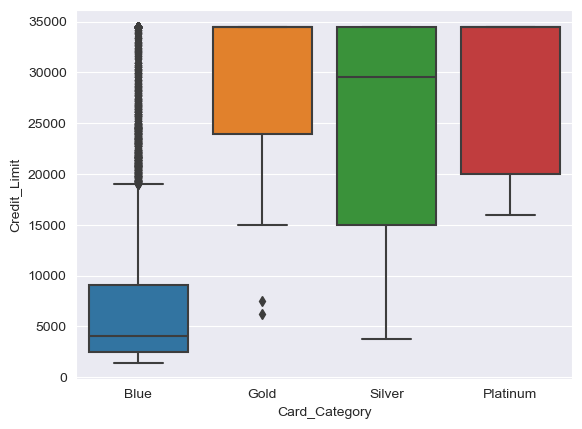

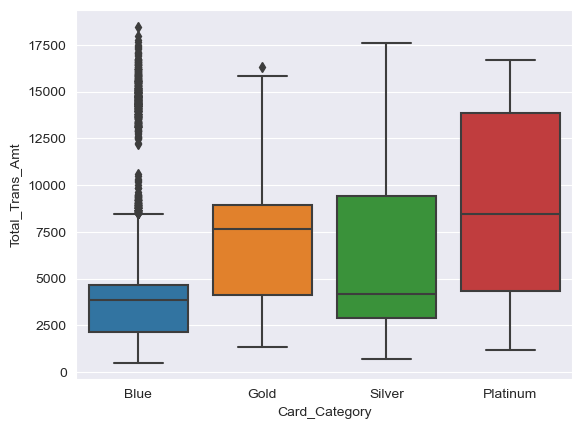

In [45]:
sns.boxplot(
    x="Card_Category", y="Credit_Limit", data=train
)
plt.show()
sns.boxplot(
    x="Card_Category", y="Total_Trans_Amt", data=train
)
plt.show()

Esto nos reafirma que puede ser una buena idea recategorizar la variable.